<a href="https://colab.research.google.com/github/MuktoFlame/ML-Journey/blob/main/02_PyTorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import dependencies

In [ ]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [ ]:
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1,],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


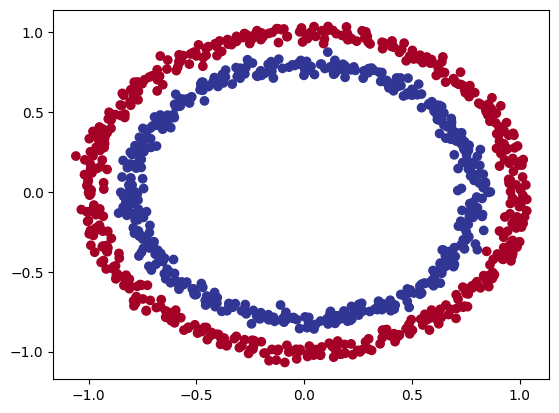

In [ ]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### Input and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

In [ ]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
"""
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
"""
"""
nn.sequential(
  nn.Sigmoid(),
  nn.BCEloss()
)
"""

'\nnn.sequential(\n  nn.Sigmoid(),\n  nn.BCEloss()\n)\n'

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.2148,  0.1309],
                      [-0.0784, -0.5468],
                      [ 0.2756,  0.6628],
                      [ 0.4735,  0.3320],
                      [ 0.0348,  0.4566]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3336,  0.3571,  0.6042, -0.0691,  0.1160], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.3109,  0.3053, -0.2504,  0.2779,  0.0769]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.1234], device='cuda:0'))])

In [ ]:
# Make predictions with the model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
  print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
  print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
  print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2253],
        [-0.2288],
        [-0.0963],
        [-0.2624],
        [ 0.0939],
        [ 0.0903],
        [-0.0703],
        [ 0.0049],
        [-0.1045],
        [-0.2270]], device='cuda:0')

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
print(list(model_0.parameters()))

[Parameter containing:
tensor([[ 0.2148,  0.1309],
        [-0.0784, -0.5468],
        [ 0.2756,  0.6628],
        [ 0.4735,  0.3320],
        [ 0.0348,  0.4566]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.3336,  0.3571,  0.6042, -0.0691,  0.1160], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([[ 0.3109,  0.3053, -0.2504,  0.2779,  0.0769]], device='cuda:0',
       requires_grad=True), Parameter containing:
tensor([-0.1234], device='cuda:0', requires_grad=True)]


In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

## Train the model

 Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2253],
        [-0.2288],
        [-0.0963],
        [-0.2624],
        [ 0.0939]], device='cuda:0')

In [ ]:
# Use sigmoid on model logits
with torch.inference_mode():
  y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4439],
        [0.4430],
        [0.4759],
        [0.4348],
        [0.5235]], device='cuda:0')

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69641, Accuracy: 48.12% | Test loss: 0.69343, Test acc: 49.00%
Epoch: 10 | Loss: 0.69544, Accuracy: 49.12% | Test loss: 0.69324, Test acc: 48.50%
Epoch: 20 | Loss: 0.69490, Accuracy: 50.00% | Test loss: 0.69333, Test acc: 47.50%
Epoch: 30 | Loss: 0.69456, Accuracy: 50.62% | Test loss: 0.69351, Test acc: 47.00%
Epoch: 40 | Loss: 0.69432, Accuracy: 50.50% | Test loss: 0.69369, Test acc: 45.50%
Epoch: 50 | Loss: 0.69414, Accuracy: 50.50% | Test loss: 0.69387, Test acc: 48.00%
Epoch: 60 | Loss: 0.69400, Accuracy: 50.00% | Test loss: 0.69402, Test acc: 49.00%
Epoch: 70 | Loss: 0.69388, Accuracy: 49.62% | Test loss: 0.69415, Test acc: 51.50%
Epoch: 80 | Loss: 0.69378, Accuracy: 49.62% | Test loss: 0.69427, Test acc: 51.00%
Epoch: 90 | Loss: 0.69370, Accuracy: 49.38% | Test loss: 0.69437, Test acc: 51.50%


## Prediction and Evaluation

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


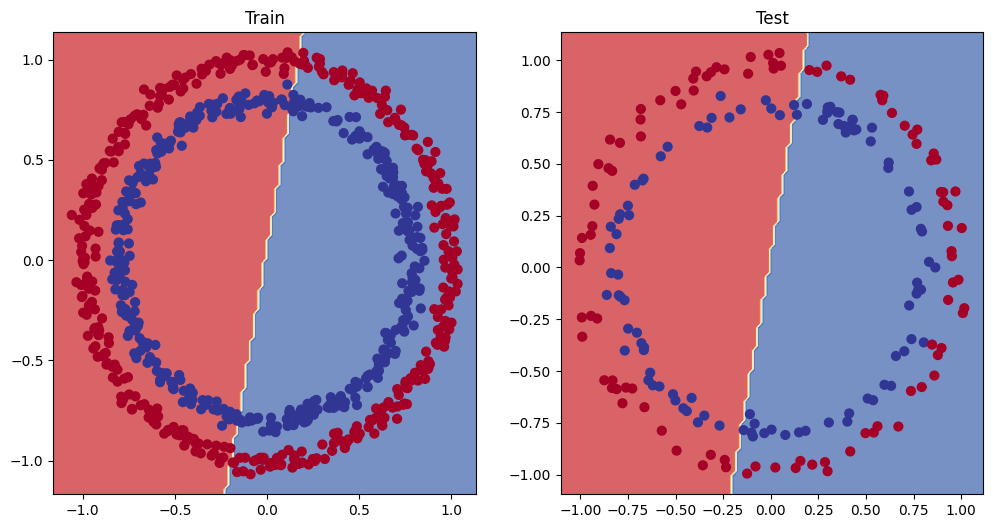

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=128)
        self.layer_3 = nn.Linear(in_features=128, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)
print(model_1)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_1(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69479, Accuracy: 46.38% | Test Loss: 0.69246, Test Accuracy: 51.50%
Epoch: 100 | Loss: 0.67294, Accuracy: 72.62% | Test Loss: 0.67888, Test Accuracy: 68.00%
Epoch: 200 | Loss: 0.64060, Accuracy: 87.12% | Test Loss: 0.65167, Test Accuracy: 82.50%
Epoch: 300 | Loss: 0.57005, Accuracy: 98.12% | Test Loss: 0.59006, Test Accuracy: 96.50%
Epoch: 400 | Loss: 0.43050, Accuracy: 99.50% | Test Loss: 0.46532, Test Accuracy: 98.50%
Epoch: 500 | Loss: 0.25750, Accuracy: 99.75% | Test Loss: 0.30081, Test Accuracy: 98.50%
Epoch: 600 | Loss: 0.15404, Accuracy: 99.88% | Test Loss: 0.19488, Test Accuracy: 99.00%
Epoch: 700 | Loss: 0.08847, Accuracy: 100.00% | Test Loss: 0.12197, Test Accuracy: 100.00%
Epoch: 800 | Loss: 0.05738, Accuracy: 100.00% | Test Loss: 0.08589, Test Accuracy: 100.00%
Epoch: 900 | Loss: 0.04089, Accuracy: 100.00% | Test Loss: 0.06563, Test Accuracy: 100.00%


In [ ]:
# Make predictions
model_1.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_1(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

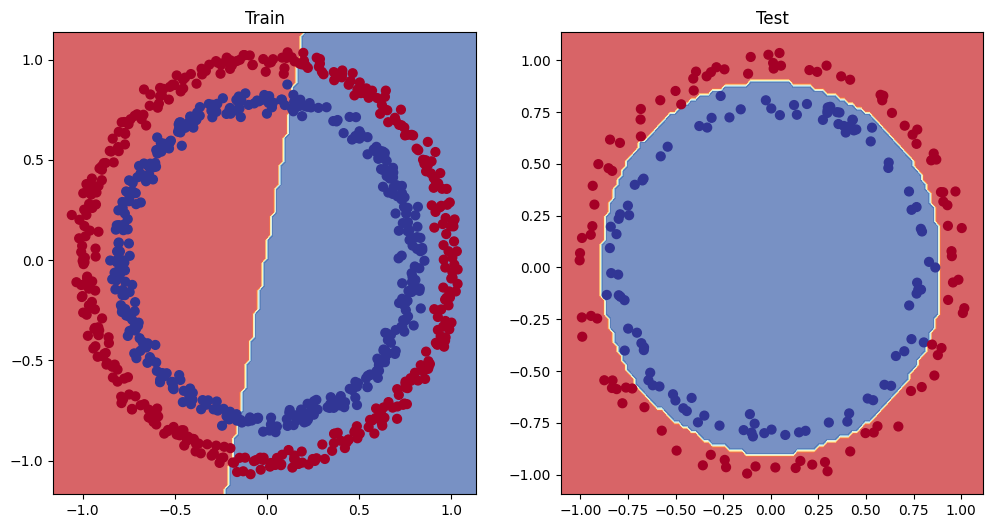

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_0 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test) # model_1 = has non-linearity

## Replicating non-linear activation functions

In [ ]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

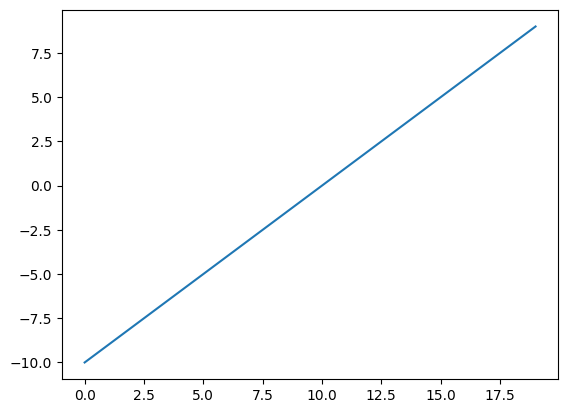

In [ ]:
# Visualize the toy tensor
plt.plot(A)

In [ ]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

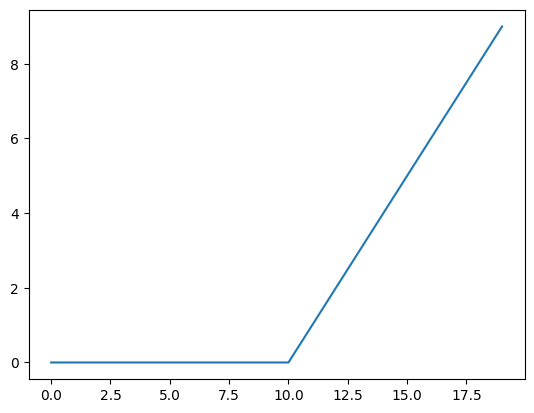

In [ ]:
plt.plot(relu(A))

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

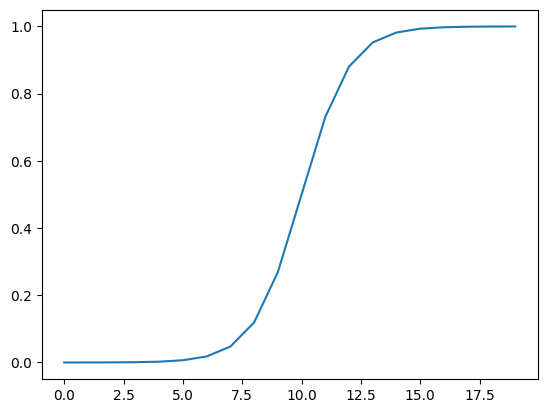

In [ ]:
plt.plot(sigmoid(A))

## Putting things together by building a multi-class PyTorch model

### Data

In [ ]:
from sklearn.datasets import make_blobs

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


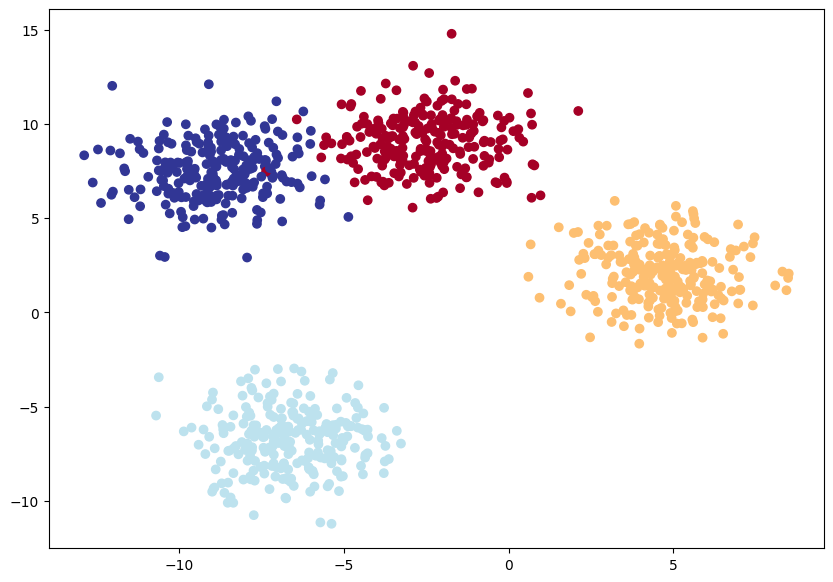

In [ ]:
# Set the hyperparameter for the data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)


# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units*3),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units*3, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_2 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_2

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=4, bias=True)
  )
)

In [ ]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),
                            lr=0.1)

In [ ]:
# Perform a single forward pass on the data
model_2(X_blob_train.to(device))[:5]

tensor([[-1.3069,  0.3878, -0.0796, -0.2630],
        [-1.2337, -0.0804, -0.3547, -1.0786],
        [-0.1178,  0.0251, -0.1842,  0.0267],
        [-0.1461,  0.0034, -0.1879,  0.0279],
        [-0.9382, -0.0517, -0.3408, -0.7974]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
# How many elements in a single prediction sample?
model_2(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

In [ ]:
with torch.inference_mode():
  # Make prediction logits with model
  y_logits = model_2(X_blob_test.to(device))

  # Perform softmax calculation on logits across dimension 1 to get prediction probabilities
  y_pred_probs = torch.softmax(y_logits, dim=1)
  print(y_logits[:5])
  print(y_pred_probs[:5])

tensor([[-1.3508,  0.4347, -0.1254, -0.3883],
        [-0.9573, -0.1154, -0.3185, -0.7779],
        [-0.1178,  0.0251, -0.1842,  0.0267],
        [-0.8356,  0.2322, -0.0692, -0.0453],
        [-1.2878, -0.0213, -0.3212, -1.0754]], device='cuda:0')
tensor([[0.0770, 0.4591, 0.2622, 0.2016],
        [0.1560, 0.3620, 0.2954, 0.1866],
        [0.2356, 0.2718, 0.2204, 0.2722],
        [0.1210, 0.3520, 0.2604, 0.2667],
        [0.1189, 0.4217, 0.3125, 0.1470]], device='cuda:0')


In [ ]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [ ]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.0770, 0.4591, 0.2622, 0.2016], device='cuda:0')
tensor(1, device='cuda:0')


### Creating a training and testing loop for a multi-class PyTorch model

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train()

    # 1. Forward pass
    y_logits = model_2(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_2(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.54231, Acc: 26.00% | Test Loss: 1.22828, Test Acc: 48.50%
Epoch: 10 | Loss: 0.57801, Acc: 74.50% | Test Loss: 0.58130, Test Acc: 73.00%
Epoch: 20 | Loss: 0.39137, Acc: 95.50% | Test Loss: 0.39985, Test Acc: 95.00%
Epoch: 30 | Loss: 0.28394, Acc: 97.62% | Test Loss: 0.28476, Test Acc: 97.50%
Epoch: 40 | Loss: 0.16242, Acc: 98.50% | Test Loss: 0.15298, Test Acc: 99.50%
Epoch: 50 | Loss: 0.08168, Acc: 99.00% | Test Loss: 0.07167, Test Acc: 99.50%
Epoch: 60 | Loss: 0.05589, Acc: 99.00% | Test Loss: 0.04661, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04550, Acc: 99.12% | Test Loss: 0.03640, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03995, Acc: 99.12% | Test Loss: 0.03089, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03652, Acc: 99.12% | Test Loss: 0.02741, Test Acc: 99.50%


In [ ]:
# Make predictions
model_2.eval()
with torch.inference_mode():
    y_logits = model_2(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 1.4968,  8.0485, -4.7053, -8.1488],
        [-0.6879, -6.1278, -0.9535,  4.8828],
        [-2.8990, -2.9805,  4.5628, -2.5651],
        [-0.4960,  5.3656, -2.0156, -4.6988],
        [ 6.0372,  0.0359, -6.5203, -5.1554],
        [-0.8329, -7.1694, -1.1634,  5.8561],
        [-3.1336, -3.2331,  4.9053, -2.7737],
        [ 4.6385, -2.9347, -4.8689, -2.1597],
        [-2.8083, -2.9373,  4.4116, -2.4641],
        [ 5.2780, -2.1083, -5.2772, -3.1915]], device='cuda:0')

In [ ]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


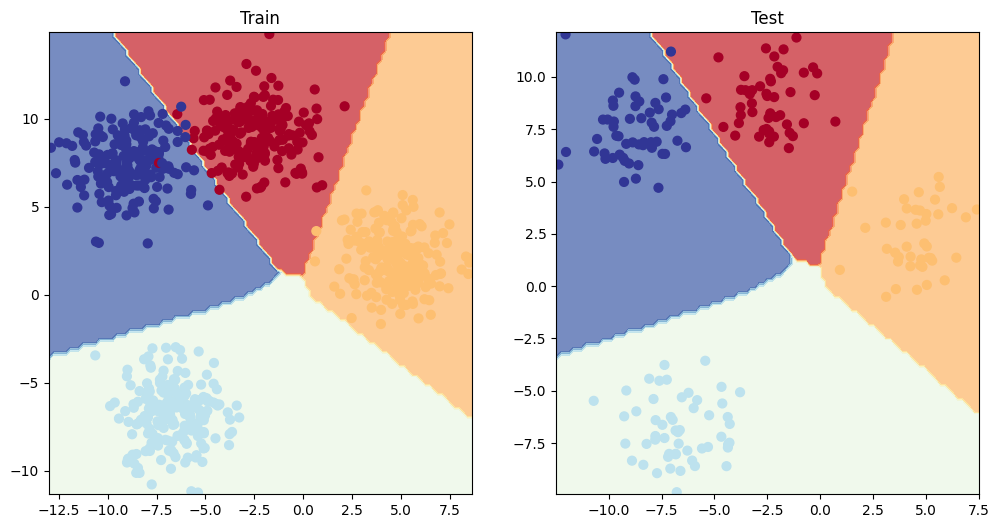

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_blob_test, y_blob_test)

In [ ]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')